# <font color= 'blue'> Deep Learning
# <font color='blue'> Homework 2 </font>

## <font color= 'blue'> Dense Neural Networks and Keras
Mehek Niwas || MTH 4320 Fall 2023

# <font color='blue'> Problem 1: Gradients </font>


*Consider a single neuron with 3 inputs and PReLU activation function. Find the mathematical formula for the gradient of the activated output with respect to its incoming weights and the learnable PReLU parameter.*

In [ ]:
from skimage import io
# function to show images using image path
def showImg(img_path):
  img = io.imread(img_path)
  fig = io.imshow(img)
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

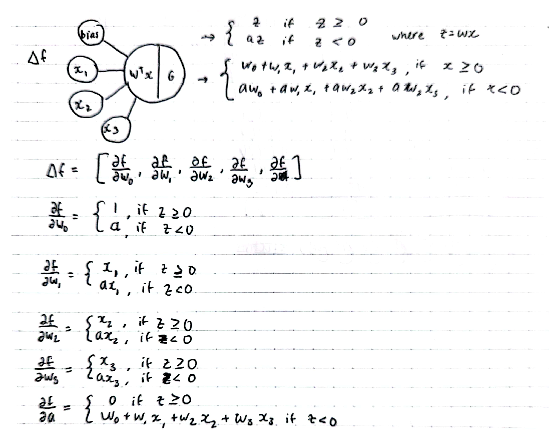

In [ ]:
img_path = "/content/problem1.jpeg"
showImg(img_path)
# can also do: --> (produces magnified display of image)
# from IPython import display
# display.Image(image_path)

# <font color='blue'> Problem 2: Dense Neural Networks </font>
*Use a FNN to classify the CIFAR-10 dataset, and tune its hyperparameters as best you can.*

***Requirements:***
  - *Normalization/Standarization*
  - *Weight Initialization*
  - *Architectures*
  - *Activation functions*
  - *Loss functions*
  - *Regularization & Dropout* --> have to include dropout



In [ ]:
# imports

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.regularizers import l1_l2
from tensorflow.python.layers.core import Dropout
from tensorflow.keras.layers import ELU, PReLU, LeakyReLU
from tensorflow.keras.layers import BatchNormalization

# <font color='blue'> Dataset Preparation & Preprocessing </font>
Loaded CIFAR-10 dataset. Mostly preprocessed, but I flattened the images as well and split the data using ```train-test-split``` to get a split of training (60%), validation (20%), and testing (20%). I switched the output values to categorical.

I also made functions for the training and performance metrics since the code is the same for every model.

In [ ]:
# data preparation

# load cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

# Flatten the images
x = x.reshape(x.shape[0], -1)

# First split: 60% train, 40% temporary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

# Second split on the temporary set: 20% validation, 20% test
x_val, test_images, y_val, test_labels = train_test_split(x_test, y_test, test_size=0.5, random_state=1)

# resize to 0-1
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# switch to categorical
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
def training(model, user_maxEpoch, x_train, y_train, x_val, y_val, user_batch_size = 256):
  # fit the model to the training data
  maxEpoch = user_maxEpoch
  H = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = maxEpoch, batch_size = user_batch_size)
  return H

In [ ]:
def categoryInsight(model, x_test, y_test):
  print('Test accuracy')

  # predict posterior probability distribution for labels of the test set
  predictedY = model.predict(x_test)

  # convert posterior probabilities to labels
  predictedY = predictedY.argmax(axis = 1)
  realY = y_test.argmax(axis = 1)

  # print classification report
  print(classification_report(realY, predictedY))

In [ ]:
def epochInsight(H, maxEpoch):
  # plot the loss and accuracy through training
  plt.style.use('ggplot')
  plt.figure()

  plt.plot(range(maxEpoch), H.history['loss'], label = 'training set loss')
  plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation set loss')
  plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training set accuracy')
  plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation set accuracy')

  plt.title('Epoch vs. Performance')
  plt.xlabel('Epoch #')
  plt.ylabel('Loss/Accuracy')
  plt.legend()

# <font color='blue'> Technique Experiment 0: Classifer Benchmark </font>
# runtime: 3 mins
*Description/Issues:* Used Keras to create layers for initial model to tune hyperparamaters, as well as for techique experiments.
- basic feed-forward neural network
- three layers
- sigmoid, softmax --> used softmax since each image can only be one class and not multiple classes at the same time, so it needs to sum up to 1 to account for dependencies.
- loss function: MSE

*Results:* Training loss is more than validation loss, **seems to be a managable amount of overfitting.**. Loss increases rather than decrease (unstable loss).

In [ ]:
# model architecture

model = Sequential()
model.add(Dense(256, input_shape=(3072,), activation="sigmoid", kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dense(128, activation = 'sigmoid', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dense(10, activation = 'softmax' kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))

# compile the model by choosing how the optimizer works
model.compile(loss = "mean_squared_error", optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 256)               786688    
                                                                 
 dense_62 (Dense)            (None, 128)               32896     
                                                                 
 dense_63 (Dense)            (None, 10)                1290      
                                                                 
Total params: 820874 (3.13 MB)
Trainable params: 820874 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/30
141/141 [==============================] - 7s 41ms/step - loss: 0.0857 - accuracy: 0.2450 - val_loss: 0.0808 - val_accuracy: 0.3034
Epoch 2/30
141/141 [==============================] - 5s 33ms/step - loss: 0.0786 - accuracy: 0.3449 - val_loss: 0.0775 - val_accuracy: 0.3536
Epoch 3/30
141/141 [==============================] - 5s 33ms/step - loss: 0.0758 - accuracy: 0.3770 - val_loss: 0.0751 - val_accuracy: 0.3849
Epoch 4/30
141/141 [==============================] - 6s 40ms/step - loss: 0.0739 - accuracy: 0.3957 - val_loss: 0.0727 - val_accuracy: 0.4053
Epoch 5/30
141/141 [==============================] - 5s 32ms/step - loss: 0.0724 - accuracy: 0.4112 - val_loss: 0.0717 - val_accuracy: 0.4242
Epoch 6/30
141/141 [==============================] - 5s 37ms/step - loss: 0.0711 - accuracy: 0.4272 - val_loss: 0.0714 - val_accuracy: 0.4205
Epoch 7/30
141/141 [==============================] - 5s 35ms/step - loss: 0.0701 - accuracy: 0.4387 - val_loss: 0.0709 - val_accuracy: 0.4304

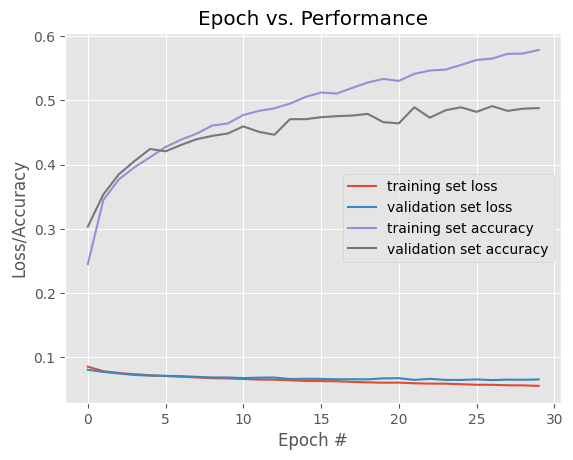

In [ ]:
maxEpoch = 30
H = training(model, maxEpoch, x_train, y_train, x_val, y_val)
categoryInsight(model, x_test, y_test)
epochInsight(H, maxEpoch)

# <font color='blue'> Technique Experiment 1: Activation & Loss function </font>
# runtime: 4 mins
*Description/Issues:* Switch activation function and loss function.
- ReLU activation
- Categorical Cross Entropy --> since there are different categories, so binary cross entropy loss would not work

*Results:* Accurary was around the same as benchmark, but was achieved faster

In [ ]:
# model architecture

model = Sequential()
model.add(Dense(256, input_shape=(3072,), activation="relu"))#, kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dense(128, activation = 'relu'))#, kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dense(10, activation = 'softmax'))#, kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))

# compile the model by choosing how the optimizer works
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               786688    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 820874 (3.13 MB)
Trainable params: 820874 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
maxEpoch = 30
H = training(model, maxEpoch, x_train, y_train, x_val, y_val)

Epoch 1/30
141/141 [==============================] - 6s 38ms/step - loss: 1.9876 - accuracy: 0.2886 - val_loss: 1.8469 - val_accuracy: 0.3460
Epoch 2/30
141/141 [==============================] - 4s 32ms/step - loss: 1.7945 - accuracy: 0.3607 - val_loss: 1.7696 - val_accuracy: 0.3672
Epoch 3/30
141/141 [==============================] - 6s 40ms/step - loss: 1.7224 - accuracy: 0.3915 - val_loss: 1.6630 - val_accuracy: 0.4104
Epoch 4/30
141/141 [==============================] - 4s 32ms/step - loss: 1.6527 - accuracy: 0.4134 - val_loss: 1.6607 - val_accuracy: 0.4158
Epoch 5/30
141/141 [==============================] - 7s 49ms/step - loss: 1.5926 - accuracy: 0.4365 - val_loss: 1.5789 - val_accuracy: 0.4384
Epoch 6/30
141/141 [==============================] - 7s 47ms/step - loss: 1.5521 - accuracy: 0.4518 - val_loss: 1.5634 - val_accuracy: 0.4443
Epoch 7/30
141/141 [==============================] - 5s 37ms/step - loss: 1.5233 - accuracy: 0.4593 - val_loss: 1.5697 - val_accuracy: 0.4418

In [ ]:
categoryInsight(model, x_test, y_test)
epochInsight(H, maxEpoch)

Test accuracy
750/750 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

           0       0.04      0.00      0.00      2351
           1       0.10      0.99      0.18      2445
           2       0.00      0.00      0.00      2389
           3       0.33      0.00      0.00      2405
           4       0.00      0.00      0.00      2416
           5       0.14      0.01      0.01      2405
           6       0.00      0.00      0.00      2411
           7       0.00      0.00      0.00      2466
           8       0.19      0.00      0.00      2368
           9       0.00      0.00      0.00      2344

    accuracy                           0.10     24000
   macro avg       0.08      0.10      0.02     24000
weighted avg       0.08      0.10      0.02     24000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# <font color='blue'> Technique Experiment 2: Regularization </font>
## runtime: 2 mins
*Description/Issues:* Added regularization to mitigate overfitting observed previously
- default weight initalization in keras is ```random_uniform```
- regularization with L1 and L2
- three layers
- reLU

*Results:* Training loss is still more than validation loss, but **the margin of overfitting compared to the initial model decreased by a substantial amount.** Looking at the specific category accuracies, two of them seem to be specifically underperforming compared to the rest.


In [ ]:
model = Sequential()

model.add(Dense(256, input_shape=(3072,), activation="relu", kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dense(128, activation = 'relu', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dense(10, activation = 'softmax', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))


# compile the model by choosing how the optimizer works
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               786688    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 820874 (3.13 MB)
Trainable params: 820874 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
maxEpoch = 30
H = training(model, maxEpoch, x_train, y_train, x_val, y_val)

Epoch 1/30
141/141 [==============================] - 13s 77ms/step - loss: 2.0364 - accuracy: 0.2911 - val_loss: 1.9239 - val_accuracy: 0.3381
Epoch 2/30
141/141 [==============================] - 4s 32ms/step - loss: 1.8468 - accuracy: 0.3658 - val_loss: 1.7931 - val_accuracy: 0.3802
Epoch 3/30
141/141 [==============================] - 5s 36ms/step - loss: 1.7502 - accuracy: 0.3967 - val_loss: 1.7127 - val_accuracy: 0.4037
Epoch 4/30
141/141 [==============================] - 5s 34ms/step - loss: 1.6884 - accuracy: 0.4173 - val_loss: 1.6607 - val_accuracy: 0.4200
Epoch 5/30
141/141 [==============================] - 4s 32ms/step - loss: 1.6405 - accuracy: 0.4325 - val_loss: 1.6318 - val_accuracy: 0.4362
Epoch 6/30
141/141 [==============================] - 5s 39ms/step - loss: 1.6037 - accuracy: 0.4441 - val_loss: 1.6002 - val_accuracy: 0.4419
Epoch 7/30
141/141 [==============================] - 4s 31ms/step - loss: 1.5675 - accuracy: 0.4581 - val_loss: 1.6116 - val_accuracy: 0.433

              precision    recall  f1-score   support

           0       0.59      0.55      0.57      2351
           1       0.66      0.60      0.63      2445
           2       0.35      0.43      0.39      2389
           3       0.32      0.39      0.35      2405
           4       0.45      0.40      0.42      2416
           5       0.44      0.30      0.36      2405
           6       0.41      0.68      0.51      2411
           7       0.65      0.53      0.58      2466
           8       0.68      0.56      0.62      2368
           9       0.60      0.51      0.55      2344

    accuracy                           0.49     24000
   macro avg       0.52      0.49      0.50     24000
weighted avg       0.52      0.49      0.50     24000



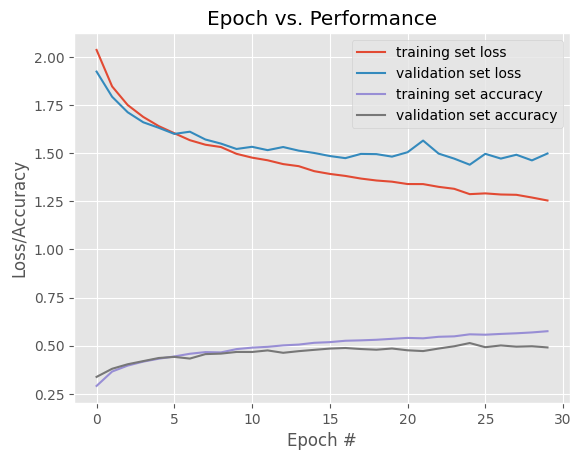

In [ ]:
categoryInsight(model, x_test, y_test)
epochInsight(H, maxEpoch)

# <font color='blue'> Technique Experiment 3: Dropout </font>
## runtime: 2 - 3 mins avg. all subsequent had around 2 - 3 mins runtime for every 30 epochs as well
*Description/Issues:* Used dropout of 0.2 to further reduce overfitting. Also used dropout of 0.5 (again partially for personal curiosity). Used dropout in different layers (input vs. hidden). Using dropout in the input layer could cause some issues in a dataset where features might have a significant meaning such as a medical dataset, but I decided to try it since CIFAR-10 is a dataset with generic images and some parts of the image may not be important in identifying what it is.

- 0.2 dropout in input layer
- 0.2 dropout in hidden layer
- 0.2 dropout in input and hidden layer
- 0.5 dropout in input layer
- 0.5 dropout in hidden layer

*Results:* **There seems to be somewhat of a tradeoff for the amount of dropout between accuracy and overfitting.** For dropout rate of 0.2, overfitting was significantly reduced! I also tried using dropout in hidden, input, and a combination of both layers. The overfitting in all three for 0.2 dropout was relatively similar. Accuracy for dropout used in both the input and hidden layer was the highest for 0.2.

For dropout rate of 0.5 used in the input layer, overfitting was also reduced, but the accuracy decreased from around 0.49 to 0.39. This actually would make sense since a dropout rate of 0.5 means that only half of the input neurons are actually contributing to predictions.
For the dropout of 0.5 used in the input layer, accuracy decreased, but for dropout used in hidden layer remained around the same. However, overfitting was decreased.

 Therefore, I think **the best trade-off between overfitting and accuracy would be with using 0.2 dropout in only the hidden layer of the model**

## 0.2 dropout in Input Layer

In [ ]:
model = Sequential()

model.add(Dense(256, input_shape=(3072,), activation="relu", kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dropout(0.2)) # dropout is applied to the output of the previous layer
model.add(Dense(128, activation = 'relu', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dense(10, activation = 'softmax', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))


# compile the model by choosing how the optimizer works
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               786688    
                                                                 
 module_wrapper_1 (ModuleWr  (None, 256)               0         
 apper)                                                          
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 820874 (3.13 MB)
Trainable params: 820874 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
maxEpoch = 30
H = training(model, maxEpoch, x_train, y_train, x_val, y_val)

Epoch 1/30
141/141 [==============================] - 7s 40ms/step - loss: 2.1182 - accuracy: 0.2544 - val_loss: 1.9033 - val_accuracy: 0.3320
Epoch 2/30
141/141 [==============================] - 5s 38ms/step - loss: 1.8950 - accuracy: 0.3317 - val_loss: 1.8046 - val_accuracy: 0.3679
Epoch 3/30
141/141 [==============================] - 7s 53ms/step - loss: 1.8209 - accuracy: 0.3632 - val_loss: 1.7394 - val_accuracy: 0.3906
Epoch 4/30
141/141 [==============================] - 7s 48ms/step - loss: 1.7728 - accuracy: 0.3799 - val_loss: 1.6775 - val_accuracy: 0.4153
Epoch 5/30
141/141 [==============================] - 5s 39ms/step - loss: 1.7291 - accuracy: 0.3925 - val_loss: 1.6370 - val_accuracy: 0.4258
Epoch 6/30
141/141 [==============================] - 5s 32ms/step - loss: 1.7145 - accuracy: 0.3993 - val_loss: 1.6259 - val_accuracy: 0.4283
Epoch 7/30
141/141 [==============================] - 5s 33ms/step - loss: 1.6957 - accuracy: 0.4017 - val_loss: 1.6401 - val_accuracy: 0.4253

              precision    recall  f1-score   support

           0       0.56      0.54      0.55      2351
           1       0.59      0.61      0.60      2445
           2       0.39      0.31      0.34      2389
           3       0.37      0.17      0.23      2405
           4       0.40      0.48      0.43      2416
           5       0.46      0.30      0.36      2405
           6       0.44      0.61      0.51      2411
           7       0.48      0.60      0.53      2466
           8       0.59      0.64      0.62      2368
           9       0.50      0.58      0.54      2344

    accuracy                           0.48     24000
   macro avg       0.48      0.48      0.47     24000
weighted avg       0.48      0.48      0.47     24000



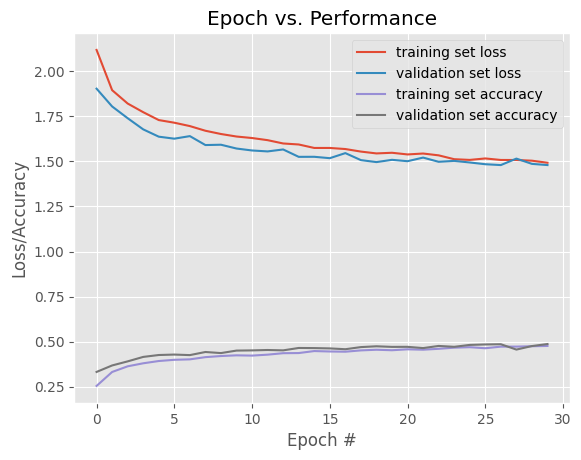

In [ ]:
categoryInsight(model, x_test, y_test)
epochInsight(H, maxEpoch)

## 0.2 dropout in Hidden Layer

In [ ]:
model = Sequential() # USING DROPOUT IN HIDDEN LAYER INSTEAD OF INPUT LAYER

model.add(Dense(256, input_shape=(3072,), activation="relu", kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dense(128, activation = 'relu', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))


# compile the model by choosing how the optimizer works
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               786688    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 module_wrapper_3 (ModuleWr  (None, 128)               0         
 apper)                                                          
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 820874 (3.13 MB)
Trainable params: 820874 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer.py:1344: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


In [ ]:
maxEpoch = 30
H = training(model, maxEpoch, x_train, y_train, x_val, y_val)

Epoch 1/30
141/141 [==============================] - 6s 34ms/step - loss: 2.1289 - accuracy: 0.2397 - val_loss: 1.9810 - val_accuracy: 0.2997
Epoch 2/30
141/141 [==============================] - 5s 38ms/step - loss: 1.9214 - accuracy: 0.3248 - val_loss: 1.8109 - val_accuracy: 0.3616
Epoch 3/30
141/141 [==============================] - 5s 32ms/step - loss: 1.8256 - accuracy: 0.3595 - val_loss: 1.7255 - val_accuracy: 0.3981
Epoch 4/30
141/141 [==============================] - 5s 32ms/step - loss: 1.7641 - accuracy: 0.3818 - val_loss: 1.7290 - val_accuracy: 0.3898
Epoch 5/30
141/141 [==============================] - 5s 38ms/step - loss: 1.7014 - accuracy: 0.4069 - val_loss: 1.6352 - val_accuracy: 0.4300
Epoch 6/30
141/141 [==============================] - 4s 31ms/step - loss: 1.6562 - accuracy: 0.4232 - val_loss: 1.6015 - val_accuracy: 0.4392
Epoch 7/30
141/141 [==============================] - 6s 44ms/step - loss: 1.6242 - accuracy: 0.4338 - val_loss: 1.5835 - val_accuracy: 0.4437

              precision    recall  f1-score   support

           0       0.66      0.41      0.51      2351
           1       0.64      0.60      0.62      2445
           2       0.35      0.43      0.38      2389
           3       0.36      0.27      0.31      2405
           4       0.47      0.39      0.43      2416
           5       0.35      0.48      0.40      2405
           6       0.57      0.46      0.51      2411
           7       0.58      0.56      0.57      2466
           8       0.58      0.71      0.63      2368
           9       0.51      0.64      0.57      2344

    accuracy                           0.50     24000
   macro avg       0.51      0.50      0.49     24000
weighted avg       0.51      0.50      0.49     24000



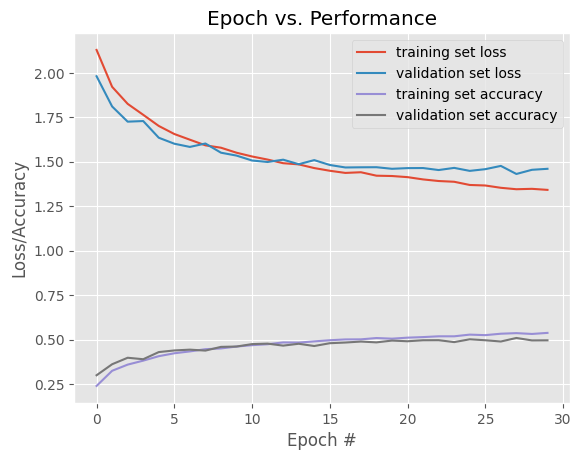

In [ ]:
categoryInsight(model, x_test, y_test)
epochInsight(H, maxEpoch)

## 0.2 dropout in Input and Hidden layer

In [ ]:
model = Sequential() # USING DROPOUT IN HIDDEN LAYER INSTEAD OF INPUT LAYER

model.add(Dense(256, input_shape=(3072,), activation="relu", kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))


# compile the model by choosing how the optimizer works
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               786688    
                                                                 
 module_wrapper_4 (ModuleWr  (None, 256)               0         
 apper)                                                          
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 module_wrapper_5 (ModuleWr  (None, 128)               0         
 apper)                                                          
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 820874 (3.13 MB)
Trainable params: 82087

/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer.py:1344: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


In [ ]:
maxEpoch = 30
H = training(model, maxEpoch, x_train, y_train, x_val, y_val)

Epoch 1/30
141/141 [==============================] - 8s 42ms/step - loss: 2.1730 - accuracy: 0.2191 - val_loss: 1.9563 - val_accuracy: 0.3277
Epoch 2/30
141/141 [==============================] - 4s 31ms/step - loss: 1.9572 - accuracy: 0.3068 - val_loss: 1.8496 - val_accuracy: 0.3567
Epoch 3/30
141/141 [==============================] - 5s 37ms/step - loss: 1.8810 - accuracy: 0.3354 - val_loss: 1.7746 - val_accuracy: 0.3757
Epoch 4/30
141/141 [==============================] - 5s 35ms/step - loss: 1.8385 - accuracy: 0.3527 - val_loss: 1.7139 - val_accuracy: 0.4017
Epoch 5/30
141/141 [==============================] - 5s 32ms/step - loss: 1.7999 - accuracy: 0.3653 - val_loss: 1.6936 - val_accuracy: 0.3993
Epoch 6/30
141/141 [==============================] - 5s 38ms/step - loss: 1.7672 - accuracy: 0.3742 - val_loss: 1.6938 - val_accuracy: 0.4109
Epoch 7/30
141/141 [==============================] - 5s 33ms/step - loss: 1.7459 - accuracy: 0.3850 - val_loss: 1.6510 - val_accuracy: 0.4204

              precision    recall  f1-score   support

           0       0.56      0.49      0.53      2351
           1       0.62      0.52      0.56      2445
           2       0.38      0.22      0.28      2389
           3       0.32      0.28      0.30      2405
           4       0.40      0.43      0.42      2416
           5       0.41      0.33      0.36      2405
           6       0.40      0.62      0.49      2411
           7       0.53      0.56      0.55      2466
           8       0.64      0.59      0.61      2368
           9       0.44      0.66      0.53      2344

    accuracy                           0.47     24000
   macro avg       0.47      0.47      0.46     24000
weighted avg       0.47      0.47      0.46     24000



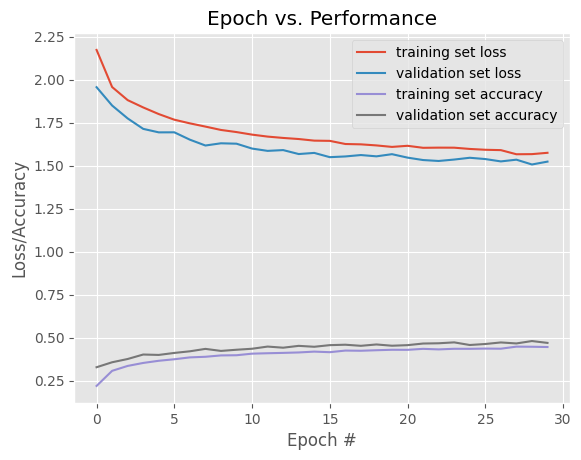

In [ ]:
categoryInsight(model, x_test, y_test)
epochInsight(H, maxEpoch)

## 0.5 dropout in Input layer

In [ ]:
model = Sequential()

model.add(Dense(256, input_shape=(3072,), activation="relu", kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dense(10, activation = 'softmax', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))

# compile the model by choosing how the optimizer works
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 256)               786688    
                                                                 
 module_wrapper_22 (ModuleW  (None, 256)               0         
 rapper)                                                         
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 dense_34 (Dense)            (None, 10)                1290      
                                                                 
Total params: 820874 (3.13 MB)
Trainable params: 820874 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
maxEpoch = 30
H = training(model, maxEpoch, x_train, y_train, x_val, y_val)

Epoch 1/30
141/141 [==============================] - 8s 48ms/step - loss: 2.2277 - accuracy: 0.1939 - val_loss: 2.0009 - val_accuracy: 0.3203
Epoch 2/30
141/141 [==============================] - 5s 36ms/step - loss: 2.0550 - accuracy: 0.2606 - val_loss: 1.9516 - val_accuracy: 0.3277
Epoch 3/30
141/141 [==============================] - 6s 43ms/step - loss: 2.0022 - accuracy: 0.2836 - val_loss: 1.8838 - val_accuracy: 0.3544
Epoch 4/30
141/141 [==============================] - 5s 36ms/step - loss: 1.9619 - accuracy: 0.2930 - val_loss: 1.8729 - val_accuracy: 0.3297
Epoch 5/30
141/141 [==============================] - 6s 43ms/step - loss: 1.9410 - accuracy: 0.3015 - val_loss: 1.8477 - val_accuracy: 0.3617
Epoch 6/30
141/141 [==============================] - 8s 59ms/step - loss: 1.9195 - accuracy: 0.3045 - val_loss: 1.8477 - val_accuracy: 0.3487
Epoch 7/30
141/141 [==============================] - 6s 42ms/step - loss: 1.9024 - accuracy: 0.3120 - val_loss: 1.8604 - val_accuracy: 0.3582

Test accuracy
750/750 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

           0       0.69      0.19      0.30      2351
           1       0.66      0.32      0.43      2445
           2       0.25      0.14      0.18      2389
           3       0.21      0.35      0.26      2405
           4       0.29      0.47      0.36      2416
           5       0.41      0.24      0.30      2405
           6       0.33      0.56      0.42      2411
           7       0.47      0.43      0.45      2466
           8       0.57      0.55      0.56      2368
           9       0.42      0.53      0.47      2344

    accuracy                           0.38     24000
   macro avg       0.43      0.38      0.37     24000
weighted avg       0.43      0.38      0.37     24000



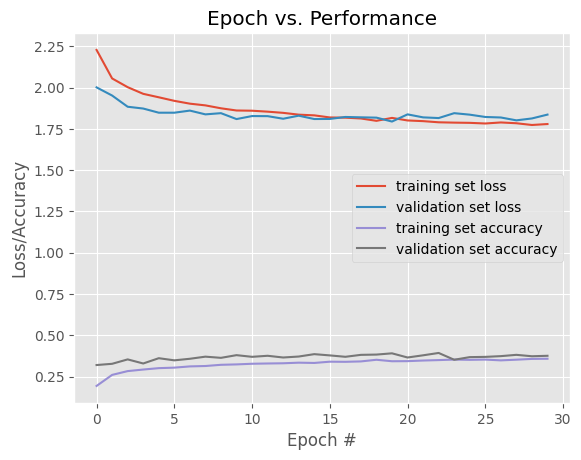

In [ ]:
categoryInsight(model, x_test, y_test)
epochInsight(H, maxEpoch)

## 0.5 dropout in Hidden layer

In [ ]:
model = Sequential()

model.add(Dense(256, input_shape=(3072,), activation="relu", kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dense(128, activation = 'relu', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))

# compile the model by choosing how the optimizer works
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 256)               786688    
                                                                 
 dense_43 (Dense)            (None, 128)               32896     
                                                                 
 module_wrapper_27 (ModuleW  (None, 128)               0         
 rapper)                                                         
                                                                 
 dense_44 (Dense)            (None, 10)                1290      
                                                                 
Total params: 820874 (3.13 MB)
Trainable params: 820874 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
maxEpoch = 30
H = training(model, maxEpoch, x_train, y_train, x_val, y_val)

Epoch 1/30
141/141 [==============================] - 7s 47ms/step - loss: 2.1474 - accuracy: 0.2277 - val_loss: 1.9543 - val_accuracy: 0.3320
Epoch 2/30
141/141 [==============================] - 5s 36ms/step - loss: 1.9646 - accuracy: 0.3062 - val_loss: 1.8284 - val_accuracy: 0.3609
Epoch 3/30
141/141 [==============================] - 6s 44ms/step - loss: 1.8844 - accuracy: 0.3417 - val_loss: 1.7568 - val_accuracy: 0.3821
Epoch 4/30
141/141 [==============================] - 5s 35ms/step - loss: 1.8211 - accuracy: 0.3622 - val_loss: 1.7082 - val_accuracy: 0.4042
Epoch 5/30
141/141 [==============================] - 6s 41ms/step - loss: 1.7717 - accuracy: 0.3852 - val_loss: 1.6576 - val_accuracy: 0.4175
Epoch 6/30
141/141 [==============================] - 5s 38ms/step - loss: 1.7314 - accuracy: 0.3951 - val_loss: 1.6511 - val_accuracy: 0.4132
Epoch 7/30
141/141 [==============================] - 5s 36ms/step - loss: 1.7033 - accuracy: 0.4067 - val_loss: 1.6207 - val_accuracy: 0.4362

Test accuracy
750/750 [==============================] - 4s 5ms/step
              precision    recall  f1-score   support

           0       0.48      0.65      0.55      2351
           1       0.59      0.64      0.62      2445
           2       0.36      0.31      0.33      2389
           3       0.34      0.25      0.29      2405
           4       0.39      0.46      0.43      2416
           5       0.40      0.36      0.38      2405
           6       0.48      0.57      0.52      2411
           7       0.52      0.58      0.55      2466
           8       0.69      0.52      0.59      2368
           9       0.59      0.48      0.53      2344

    accuracy                           0.48     24000
   macro avg       0.48      0.48      0.48     24000
weighted avg       0.48      0.48      0.48     24000



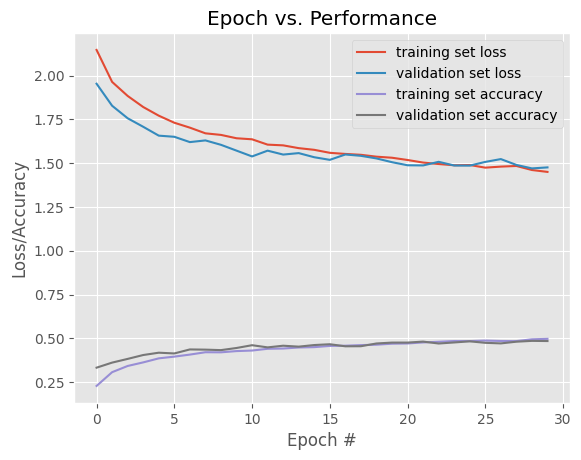

In [ ]:
categoryInsight(model, x_test, y_test)
epochInsight(H, maxEpoch)

# <font color='blue'> Technique Experiment 4: Activation & Architecture </font>
## runtime: 30 mins avg for 300 epochs
*Description/Issues:* Added more layers, used Dropout in Hidden and Input layers. Switched to PReLU activation, since PReLU can be used to further reduced overfitting because of it's ability to utilize a slope when fed negative input values. Increased epochs from 30 to 300.

- Layer 1: Dense, Dropout= NONE, Regularizer
- Layer 2: Dense, Dropout=0.2, PReLU
- Layer 3: Dense, Dropout=0.1, PReLU
- Layer 4: Dense, Dropoout= NONE, PReLU

*Results:* **The accuracy only changed from around 0.48 - 0.50 from the last technique experiment to 0.53.** I thought this was quite alarming because I **expected to see a much higher accuracy after increasing epochs by 10-fold.** Maybe I should try to decrease the amount of layers? Or possibly see if the activation function was the issue, although PReLU is usually more useful in architectures with more layers. **There was also a lot of overfitting after the first ten epochs.**

In [ ]:
model = Sequential()

model.add(Flatten())

model.add(Dense(256, input_shape=(3072,), kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(PReLU())

model.add(Dense(128, kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(PReLU())
model.add(Dropout(0.2))

model.add(Dense(64, kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(PReLU())

model.add(Dense(10, activation = 'softmax', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))


# compile the model by choosing how the optimizer works
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
# model.summary()

In [ ]:
# was only able to get summary after fitting/training the model
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_49 (Dense)            (None, 256)               786688    
                                                                 
 p_re_lu_21 (PReLU)          (None, 256)               256       
                                                                 
 dense_50 (Dense)            (None, 128)               32896     
                                                                 
 p_re_lu_22 (PReLU)          (None, 128)               128       
                                                                 
 module_wrapper_31 (ModuleW  (None, 128)               0         
 rapper)                                                         
                                                     

In [ ]:
maxEpoch = 300
H = training(model, maxEpoch, x_train, y_train, x_val, y_val, user_batch_size = 256)

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer.py:1344: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


141/141 [==============================] - 8s 46ms/step - loss: 2.1075 - accuracy: 0.2502 - val_loss: 1.9183 - val_accuracy: 0.3245
Epoch 2/300
141/141 [==============================] - 6s 41ms/step - loss: 1.8818 - accuracy: 0.3412 - val_loss: 1.7856 - val_accuracy: 0.3673
Epoch 3/300
141/141 [==============================] - 5s 37ms/step - loss: 1.7954 - accuracy: 0.3735 - val_loss: 1.7304 - val_accuracy: 0.3885
Epoch 4/300
141/141 [==============================] - 6s 46ms/step - loss: 1.7291 - accuracy: 0.3919 - val_loss: 1.6844 - val_accuracy: 0.4098
Epoch 5/300
141/141 [==============================] - 5s 39ms/step - loss: 1.6729 - accuracy: 0.4154 - val_loss: 1.6348 - val_accuracy: 0.4213
Epoch 6/300
141/141 [==============================] - 8s 59ms/step - loss: 1.6467 - accuracy: 0.4244 - val_loss: 1.6744 - val_accuracy: 0.4118
Epoch 7/300
141/141 [==============================] - 9s 63ms/step - loss: 1.6198 - accuracy: 0.4362 - val_loss: 1.5671 - val_accuracy: 0.4506
Epoc

Test accuracy
750/750 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      2351
           1       0.68      0.62      0.65      2445
           2       0.46      0.32      0.38      2389
           3       0.37      0.33      0.35      2405
           4       0.41      0.55      0.47      2416
           5       0.45      0.35      0.39      2405
           6       0.48      0.67      0.56      2411
           7       0.61      0.58      0.60      2466
           8       0.66      0.64      0.65      2368
           9       0.59      0.59      0.59      2344

    accuracy                           0.53     24000
   macro avg       0.53      0.53      0.52     24000
weighted avg       0.53      0.53      0.52     24000



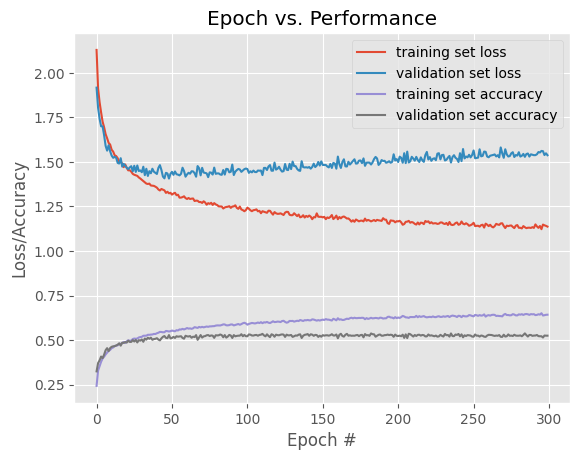

In [ ]:
categoryInsight(model, x_test, y_test)
epochInsight(H, maxEpoch)

# <font color='blue'> Technique Experiment 5: Weight Intialization, Batch Normalization, & Architecture </font>

*Description/Issues:* Added Batch Normalization in first layer, used `glorot_uniform` weight intializer to aid with any vanishing or exploding gradients. No dropout after third hidden layer. Decreased epochs to 100.

*Results:* **The accuracy was only 0.50, with significant overfitting.** Looks like early stopping may be necessary, along with an increase in dropout.

-- New model with early stopping for 20 epochs. used 0.3 dropout in second layer and 0.2 dropout in third layer. Decreased batch size to aid with overfitting/accuracy

*Updated Results:* **Accuracy: 0.52 with significant overfitting.** Early stopping at 21 epochs.

-- New model with batch normalization in each layer, took out regularizer since dropout was high enough for regularizer to no longer make a big different

*Updated Results:* **Accuracy: 0.56, still with significant overfitting.** Early stopping at around 35 epochs .

In [ ]:
from keras.initializers import Constant

model = Sequential()

#initializer
i = 'glorot_uniform'

model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, input_shape=(3072,), kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(PReLU())

model.add(Dense(128, kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(PReLU())
model.add(Dropout(0.2))

model.add(Dense(64, kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(PReLU())

model.add(Dense(10, activation = 'softmax', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))


# compile the model by choosing how the optimizer works
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
# model.summary()


In [ ]:
# was only able to get summary after fitting/training the model
model.summary()

In [ ]:
maxEpoch = 100
H = training(model, maxEpoch, x_train, y_train, x_val, y_val, user_batch_size = 1024)

Epoch 1/100
36/36 [==============================] - 13s 235ms/step - loss: 2.0615 - accuracy: 0.3038 - val_loss: 2.1342 - val_accuracy: 0.2637
Epoch 2/100
36/36 [==============================] - 8s 235ms/step - loss: 1.7653 - accuracy: 0.4040 - val_loss: 1.9852 - val_accuracy: 0.3647
Epoch 3/100
36/36 [==============================] - 6s 158ms/step - loss: 1.6597 - accuracy: 0.4459 - val_loss: 1.8509 - val_accuracy: 0.4188
Epoch 4/100
36/36 [==============================] - 7s 188ms/step - loss: 1.5844 - accuracy: 0.4688 - val_loss: 1.7633 - val_accuracy: 0.4408
Epoch 5/100
36/36 [==============================] - 7s 192ms/step - loss: 1.5198 - accuracy: 0.4939 - val_loss: 1.6800 - val_accuracy: 0.4653
Epoch 6/100
36/36 [==============================] - 9s 238ms/step - loss: 1.4608 - accuracy: 0.5113 - val_loss: 1.6134 - val_accuracy: 0.4732
Epoch 7/100
36/36 [==============================] - 8s 216ms/step - loss: 1.4187 - accuracy: 0.5284 - val_loss: 1.5777 - val_accuracy: 0.472

Test accuracy
750/750 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      2351
           1       0.66      0.58      0.62      2445
           2       0.38      0.42      0.40      2389
           3       0.32      0.32      0.32      2405
           4       0.42      0.45      0.44      2416
           5       0.40      0.37      0.38      2405
           6       0.57      0.49      0.53      2411
           7       0.55      0.56      0.56      2466
           8       0.65      0.63      0.64      2368
           9       0.55      0.59      0.57      2344

    accuracy                           0.50     24000
   macro avg       0.51      0.50      0.50     24000
weighted avg       0.51      0.50      0.50     24000



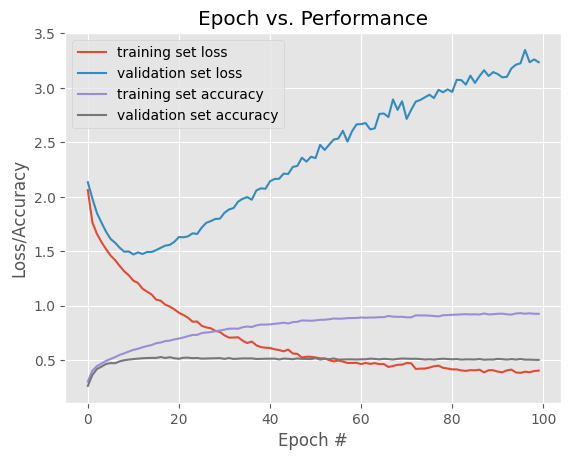

In [ ]:
categoryInsight(model, x_test, y_test)
epochInsight(H, maxEpoch)

## Dropout increase, Batch size decrease, Early stopping

In [ ]:
from keras.initializers import Constant

model = Sequential()

#initializer
i = 'glorot_uniform'

model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, input_shape=(3072,), kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(PReLU())

model.add(Dense(128, kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(PReLU())
model.add(Dropout(0.3))

model.add(Dense(64, kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(PReLU())
model.add(Dropout(0.2))

model.add(Dense(10, activation = 'softmax', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))


# compile the model by choosing how the optimizer works
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
# model.summary()


In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# batch size
user_batch_size = 512

# early stopping
es = EarlyStopping(
    monitor = 'val_loss',
    patience = 20,
    verbose = 1,
    mode = "min"
)

# checkpoint / save best weights
mc = ModelCheckpoint(
    'best_m.h5',
     monitor = 'val_accuracy',
     mode = 'max',
     verbose = 1,
     save_best_only = True
 )

# fit the model to the training data
maxEpoch = 100
H = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = maxEpoch, callbacks=[es], verbose=2, batch_size = user_batch_size)

Epoch 1/100
71/71 - 7s - loss: 0.8377 - accuracy: 0.7499 - val_loss: 1.7971 - val_accuracy: 0.5314 - 7s/epoch - 97ms/step
Epoch 2/100
71/71 - 6s - loss: 0.8444 - accuracy: 0.7486 - val_loss: 1.8601 - val_accuracy: 0.5373 - 6s/epoch - 83ms/step
Epoch 3/100
71/71 - 7s - loss: 0.8257 - accuracy: 0.7558 - val_loss: 1.8920 - val_accuracy: 0.5328 - 7s/epoch - 97ms/step
Epoch 4/100
71/71 - 6s - loss: 0.8167 - accuracy: 0.7606 - val_loss: 1.9188 - val_accuracy: 0.5271 - 6s/epoch - 81ms/step
Epoch 5/100
71/71 - 7s - loss: 0.8013 - accuracy: 0.7649 - val_loss: 1.9377 - val_accuracy: 0.5236 - 7s/epoch - 95ms/step
Epoch 6/100
71/71 - 6s - loss: 0.8063 - accuracy: 0.7665 - val_loss: 1.9434 - val_accuracy: 0.5325 - 6s/epoch - 83ms/step
Epoch 7/100
71/71 - 7s - loss: 0.7825 - accuracy: 0.7769 - val_loss: 1.9645 - val_accuracy: 0.5328 - 7s/epoch - 95ms/step
Epoch 8/100
71/71 - 6s - loss: 0.7657 - accuracy: 0.7804 - val_loss: 1.9862 - val_accuracy: 0.5316 - 6s/epoch - 83ms/step
Epoch 9/100
71/71 - 7s -

Test accuracy
750/750 [==============================] - 5s 6ms/step
              precision    recall  f1-score   support

           0       0.55      0.62      0.59      2351
           1       0.65      0.65      0.65      2445
           2       0.41      0.41      0.41      2389
           3       0.33      0.35      0.34      2405
           4       0.50      0.42      0.45      2416
           5       0.39      0.47      0.43      2405
           6       0.61      0.47      0.53      2411
           7       0.59      0.59      0.59      2466
           8       0.66      0.65      0.65      2368
           9       0.58      0.60      0.59      2344

    accuracy                           0.52     24000
   macro avg       0.53      0.52      0.52     24000
weighted avg       0.53      0.52      0.52     24000



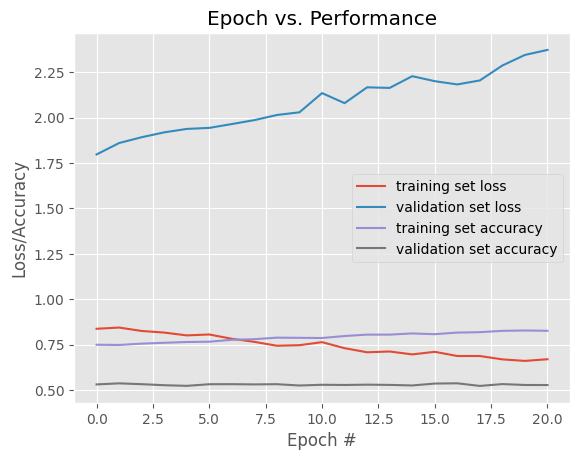

In [ ]:
categoryInsight(model, x_test, y_test)
epochInsight(H, 21) # since epochs early stopped after 21

## Batch normalization in each layer, removed Regularizer

In [ ]:
model = Sequential()

#initializer
i = 'glorot_uniform'

model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(256, input_shape=(3072,), kernel_initializer=i))
model.add(BatchNormalization())
model.add(PReLU())
model.add(Dropout(0.2))

model.add(Dense(128, kernel_initializer=i))
model.add(BatchNormalization())
model.add(PReLU())
model.add(Dropout(0.1))

model.add(Dense(64, kernel_initializer=i))
model.add(PReLU())
model.add(Dropout(0.1))

model.add(Dense(10, activation = 'softmax', kernel_initializer=i))

# compile the model by choosing how the optimizer works
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
# model.summary()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# batch size
user_batch_size = 512

# early stopping
es = EarlyStopping(
    monitor = 'val_loss',
    patience = 20,
    verbose = 1,
    mode = "min"
)

# checkpoint / save best weights
mc = ModelCheckpoint(
    'best_m.h5',
     monitor = 'val_accuracy',
     mode = 'max',
     verbose = 1,
     save_best_only = True
 )

# fit the model to the training data
maxEpoch = 100
H = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = maxEpoch, callbacks=[es], verbose=2, batch_size = user_batch_size)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer.py:1344: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


71/71 - 10s - loss: 1.8441 - accuracy: 0.3381 - val_loss: 1.8970 - val_accuracy: 0.3079 - 10s/epoch - 142ms/step
Epoch 2/100
71/71 - 9s - loss: 1.6212 - accuracy: 0.4228 - val_loss: 1.6385 - val_accuracy: 0.4387 - 9s/epoch - 129ms/step
Epoch 3/100
71/71 - 9s - loss: 1.5305 - accuracy: 0.4519 - val_loss: 1.5093 - val_accuracy: 0.4728 - 9s/epoch - 121ms/step
Epoch 4/100
71/71 - 7s - loss: 1.4591 - accuracy: 0.4781 - val_loss: 1.4461 - val_accuracy: 0.4906 - 7s/epoch - 97ms/step
Epoch 5/100
71/71 - 6s - loss: 1.4035 - accuracy: 0.4975 - val_loss: 1.3779 - val_accuracy: 0.5163 - 6s/epoch - 84ms/step
Epoch 6/100
71/71 - 9s - loss: 1.3539 - accuracy: 0.5162 - val_loss: 1.3400 - val_accuracy: 0.5270 - 9s/epoch - 132ms/step
Epoch 7/100
71/71 - 6s - loss: 1.3120 - accuracy: 0.5299 - val_loss: 1.3239 - val_accuracy: 0.5288 - 6s/epoch - 84ms/step
Epoch 8/100
71/71 - 7s - loss: 1.2751 - accuracy: 0.5462 - val_loss: 1.3137 - val_accuracy: 0.5361 - 7s/epoch - 98ms/step
Epoch 9/100
71/71 - 6s - loss:

Test accuracy
750/750 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

           0       0.60      0.64      0.62      2351
           1       0.67      0.68      0.67      2445
           2       0.46      0.42      0.44      2389
           3       0.38      0.37      0.38      2405
           4       0.48      0.51      0.50      2416
           5       0.44      0.45      0.44      2405
           6       0.63      0.59      0.61      2411
           7       0.62      0.63      0.63      2466
           8       0.69      0.65      0.67      2368
           9       0.59      0.64      0.61      2344

    accuracy                           0.56     24000
   macro avg       0.56      0.56      0.56     24000
weighted avg       0.56      0.56      0.56     24000



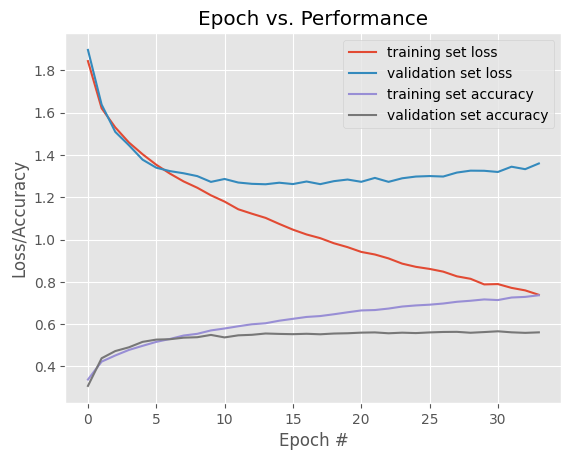

In [ ]:
categoryInsight(model, x_test, y_test)
epochInsight(H, 34) # since epochs early stopped after 35

# <font color='blue'> Technique Experiment 6: Bias Intialization & Dropout </font>

*Description/Issues:* Used Bias Intialization in input layer to mitigate possible uneccessary ReLU dying neurons. Increased dropout again to decrease overfitting

*Results:* **Accuracy did not change from 0.56, again with significant overfitting!**

In [ ]:
from keras.initializers import Constant

model = Sequential()

#initializer
i = 'glorot_uniform'

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, input_shape=(3072,), kernel_initializer=i, bias_initializer=Constant(value=0.1)))
model.add(BatchNormalization())
model.add(PReLU())
model.add(Dropout(0.35))

model.add(Dense(128, kernel_initializer=i))
model.add(BatchNormalization())
model.add(PReLU())
model.add(Dropout(0.1))

model.add(Dense(64, kernel_initializer=i))
model.add(PReLU())
model.add(Dropout(0.1))

model.add(Dense(10, activation = 'softmax', kernel_initializer=i))

# compile the model by choosing how the optimizer works
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
# model.summary()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# batch size
user_batch_size = 512

# early stopping
es = EarlyStopping(
    monitor = 'val_loss',
    patience = 20,
    verbose = 1,
    mode = "min"
)

# checkpoint / save best weights
mc = ModelCheckpoint(
  'best_m.h5',
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    save_best_only = True
 )

# fit the model to the training data
maxEpoch = 100
H = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = maxEpoch, callbacks=[es], verbose=2, batch_size = user_batch_size)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer.py:1344: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


71/71 - 10s - loss: 1.9258 - accuracy: 0.3166 - val_loss: 1.9267 - val_accuracy: 0.2994 - 10s/epoch - 140ms/step
Epoch 2/100
71/71 - 6s - loss: 1.6882 - accuracy: 0.3999 - val_loss: 1.6905 - val_accuracy: 0.4257 - 6s/epoch - 84ms/step
Epoch 3/100
71/71 - 7s - loss: 1.6003 - accuracy: 0.4257 - val_loss: 1.5652 - val_accuracy: 0.4574 - 7s/epoch - 100ms/step
Epoch 4/100
71/71 - 6s - loss: 1.5452 - accuracy: 0.4474 - val_loss: 1.4850 - val_accuracy: 0.4833 - 6s/epoch - 85ms/step
Epoch 5/100
71/71 - 9s - loss: 1.4894 - accuracy: 0.4686 - val_loss: 1.4221 - val_accuracy: 0.4995 - 9s/epoch - 123ms/step
Epoch 6/100
71/71 - 8s - loss: 1.4479 - accuracy: 0.4815 - val_loss: 1.3958 - val_accuracy: 0.5093 - 8s/epoch - 113ms/step
Epoch 7/100
71/71 - 6s - loss: 1.4120 - accuracy: 0.4956 - val_loss: 1.3598 - val_accuracy: 0.5253 - 6s/epoch - 83ms/step
Epoch 8/100
71/71 - 7s - loss: 1.3840 - accuracy: 0.5040 - val_loss: 1.3374 - val_accuracy: 0.5274 - 7s/epoch - 100ms/step
Epoch 9/100
71/71 - 6s - loss

Test accuracy
750/750 [==============================] - 5s 7ms/step
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      2351
           1       0.63      0.72      0.67      2445
           2       0.48      0.39      0.43      2389
           3       0.39      0.33      0.36      2405
           4       0.50      0.47      0.49      2416
           5       0.45      0.46      0.46      2405
           6       0.57      0.67      0.62      2411
           7       0.65      0.64      0.64      2466
           8       0.68      0.70      0.69      2368
           9       0.60      0.60      0.60      2344

    accuracy                           0.56     24000
   macro avg       0.56      0.56      0.56     24000
weighted avg       0.56      0.56      0.56     24000



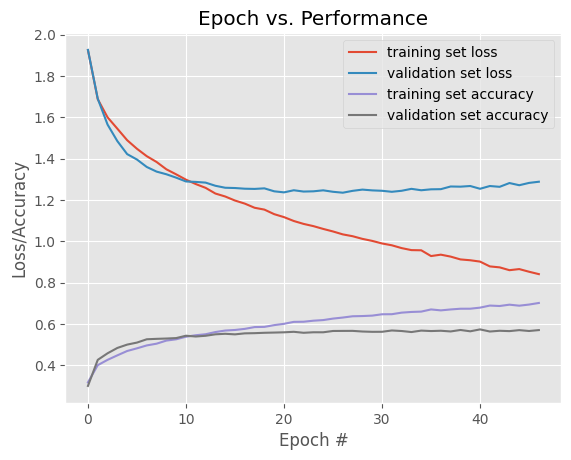

In [ ]:
categoryInsight(model, x_test, y_test)
epochInsight(H, 47) # since epochs early stopped after 35

# <font color='blue'> Conclusion </font>
Highest accuracy was found with 4 layers, dropout in 2nd and 3rd layer, lower batch size, batch normalization in almost all layers, and removal of regularizer from Tuning Experiment 5.
Final accuracy was **56%**, which can be improved along with overfitting by continuing to experiment with regularization, batch size, and dropout.

Observation: Once the training accuracy starts to rapidly increase, accuracy on the validation set halts.
